# tutorial 02

### basics of pseudo-$C_\ell$ estimator

In [1]:
import numpy as np
import healpy as hp
import matplotlib
import abspy as ap
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
map95 = hp.read_map('./data/TQU_95GHz_r6.fits',field=[0,1,2],dtype=np.float64,verbose=0)
map150 = hp.read_map('./data/TQU_150GHz_r6.fits',field=[0,1,2],dtype=np.float64,verbose=0)
map353 = hp.read_map('./data/TQU_353GHz_r6.fits',field=[0,1,2],dtype=np.float64,verbose=0)
mapcmb = hp.read_map('./data/TQU_CMB_r6.fits',field=[0,1,2],dtype=np.float64,verbose=0)
print (map95.shape, map95.dtype)

(3, 49152) float64


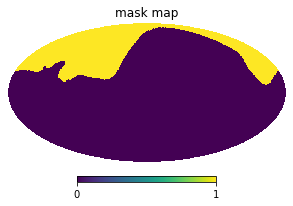

In [3]:
mask = hp.read_map('./data/Ali_mask_r6.fits',dtype=np.float64,verbose=False)

fig = matplotlib.pyplot.figure(figsize=(5,5))
gs = matplotlib.gridspec.GridSpec(5, 5)
fig.add_subplot(gs[0:5, 0:5])
hp.mollview(mask,title='mask map',hold=True)

- call the `pstimator` only once

In [4]:
est = ap.pstimator()

(1e-08, 1000.0)

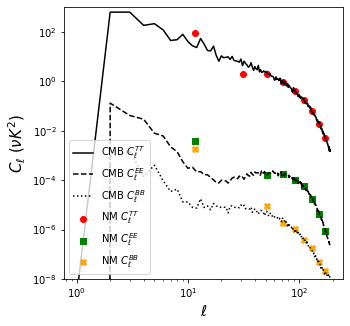

In [5]:
cmbauto = est.auto_teb(list(mapcmb), mask, aposcale=1.0, binning=20)

fig,ax = matplotlib.pyplot.subplots(figsize=(5,5))
ax.scatter(cmbauto[0],cmbauto[1],
           color='red',marker='o',label=r'NM $C^{TT}_\ell$')
ax.scatter(cmbauto[0],cmbauto[2],
           color='green',marker='s',label=r'NM $C^{EE}_\ell$')
ax.scatter(cmbauto[0],cmbauto[3],
           color='orange',marker='X',label=r'NM $C^{BB}_\ell$')

cmb_cl = hp.anafast(mapcmb)
ell = np.arange(cmb_cl.shape[1])
ax.plot(cmb_cl[0],
        color='black',linestyle='-',label=r'CMB $C^{TT}_\ell$')
ax.plot(cmb_cl[1],
        color='black',linestyle='--',label=r'CMB $C^{EE}_\ell$')
ax.plot(cmb_cl[2],
        color='black',linestyle=':',label=r'CMB $C^{BB}_\ell$')

ax.set_yscale('log')
ax.set_xscale('log')
ax.legend(loc=3)
ax.set_xlabel(r'$\ell$',fontsize=15)
ax.set_ylabel(r'$C_\ell$ ($\nu K^2$)',fontsize=15)
ax.set_ylim((1.e-8,1.e3))

(1e-08, 1000.0)

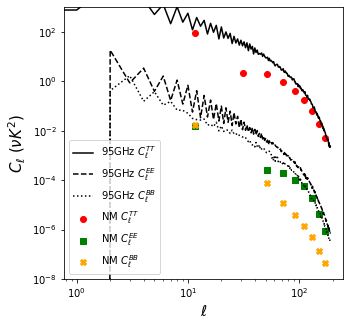

In [6]:
f95auto = est.auto_teb(list(map95), mask, aposcale=1.0, binning=20)

fig,ax = matplotlib.pyplot.subplots(figsize=(5,5))
ax.scatter(cmbauto[0],f95auto[1],
           color='red',marker='o',label=r'NM $C^{TT}_\ell$')
ax.scatter(cmbauto[0],f95auto[2],
           color='green',marker='s',label=r'NM $C^{EE}_\ell$')
ax.scatter(cmbauto[0],f95auto[3],
           color='orange',marker='X',label=r'NM $C^{BB}_\ell$')

f95_cl = hp.anafast(map95)
ell = np.arange(f95_cl.shape[1])
ax.plot(f95_cl[0],
        color='black',linestyle='-',label=r'95GHz $C^{TT}_\ell$')
ax.plot(f95_cl[1],
        color='black',linestyle='--',label=r'95GHz $C^{EE}_\ell$')
ax.plot(f95_cl[2],
        color='black',linestyle=':',label=r'95GHz $C^{BB}_\ell$')

ax.set_yscale('log')
ax.set_xscale('log')
ax.legend(loc=3)
ax.set_xlabel(r'$\ell$',fontsize=15)
ax.set_ylabel(r'$C_\ell$ ($\nu K^2$)',fontsize=15)
ax.set_ylim((1.e-8,1.e3))

- customized mask

In [7]:
# iso-angular-separation mask generator
def mask_map_prod(nside, clon, clat, sep):
    _c = np.pi/180
    def hav(theta):
        return 0.5-0.5*np.cos(theta)
    _tmp = np.ones(hp.nside2npix(nside),dtype=bool)
    _count = 0
    for _ipix in range(len(_tmp)):
        _lon,_lat = hp.pix2ang(nside,_ipix,lonlat=True)
        # iso-angle separation
        if((hav(np.fabs(clat-_lat)*_c)+np.cos(clat*_c)*np.cos(_lat*_c)*hav(np.fabs(clon-_lon)*_c))>hav(sep*_c)):
            _count = _count + 1
            _tmp[_ipix] = False
    print ('sky faction: ', (1 - _count/(12*nside*nside)))
    return _tmp

sky faction:  0.11692301432291663


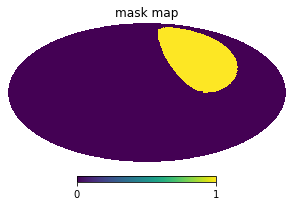

In [8]:
mask_cst = mask_map_prod(64, 280, 40, 40)

fig = matplotlib.pyplot.figure(figsize=(5,5))
gs = matplotlib.gridspec.GridSpec(5, 5)
fig.add_subplot(gs[0:5, 0:5])
hp.mollview(mask_cst,title='mask map',hold=True)

(1e-08, 1000.0)

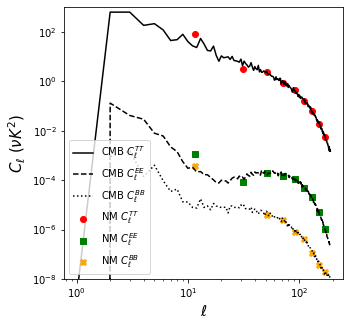

In [9]:
cmbauto = est.auto_teb(list(mapcmb), mask_cst, aposcale=1.0, binning=20)

fig,ax = matplotlib.pyplot.subplots(figsize=(5,5))
ax.scatter(cmbauto[0],cmbauto[1],
           color='red',marker='o',label=r'NM $C^{TT}_\ell$')
ax.scatter(cmbauto[0],cmbauto[2],
           color='green',marker='s',label=r'NM $C^{EE}_\ell$')
ax.scatter(cmbauto[0],cmbauto[3],
           color='orange',marker='X',label=r'NM $C^{BB}_\ell$')

cmb_cl = hp.anafast(mapcmb)
ell = np.arange(cmb_cl.shape[1])
ax.plot(cmb_cl[0],
        color='black',linestyle='-',label=r'CMB $C^{TT}_\ell$')
ax.plot(cmb_cl[1],
        color='black',linestyle='--',label=r'CMB $C^{EE}_\ell$')
ax.plot(cmb_cl[2],
        color='black',linestyle=':',label=r'CMB $C^{BB}_\ell$')

ax.set_yscale('log')
ax.set_xscale('log')
ax.legend(loc=3)
ax.set_xlabel(r'$\ell$',fontsize=15)
ax.set_ylabel(r'$C_\ell$ ($\nu K^2$)',fontsize=15)
ax.set_ylim((1.e-8,1.e3))

(1e-08, 1000.0)

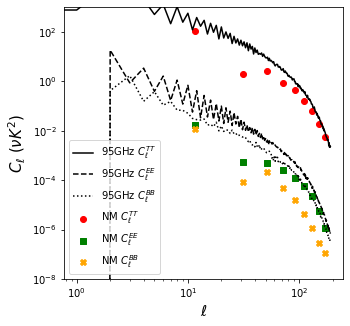

In [10]:
f95auto = est.auto_teb(list(map95), mask_cst, aposcale=1.0, binning=20)

fig,ax = matplotlib.pyplot.subplots(figsize=(5,5))
ax.scatter(cmbauto[0],f95auto[1],
           color='red',marker='o',label=r'NM $C^{TT}_\ell$')
ax.scatter(cmbauto[0],f95auto[2],
           color='green',marker='s',label=r'NM $C^{EE}_\ell$')
ax.scatter(cmbauto[0],f95auto[3],
           color='orange',marker='X',label=r'NM $C^{BB}_\ell$')

f95_cl = hp.anafast(map95)
ell = np.arange(f95_cl.shape[1])
ax.plot(f95_cl[0],
        color='black',linestyle='-',label=r'95GHz $C^{TT}_\ell$')
ax.plot(f95_cl[1],
        color='black',linestyle='--',label=r'95GHz $C^{EE}_\ell$')
ax.plot(f95_cl[2],
        color='black',linestyle=':',label=r'95GHz $C^{BB}_\ell$')

ax.set_yscale('log')
ax.set_xscale('log')
ax.legend(loc=3)
ax.set_xlabel(r'$\ell$',fontsize=15)
ax.set_ylabel(r'$C_\ell$ ($\nu K^2$)',fontsize=15)
ax.set_ylim((1.e-8,1.e3))

end